In [1]:
import pandas as pd

#Punctuations
import string

#reg Expressions
import re

#emojis with description
import demoji

#sentences to words
from nltk.tokenize import TreebankWordTokenizer

#paras to sentences
from nltk.tokenize import sent_tokenize

#stopwords
from nltk.corpus import stopwords

from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# demoji.download_codes()
from datetime import datetime, date

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
pd.set_option('display.max_colwidth', 1000)
import operator
import numpy as np

In [2]:
file = pd.read_csv('C:\\Users\\nikita\\Downloads/IRAhandle_tweets_1.csv')

In [95]:
# file.head(2)

In [5]:
# subset of entire csv based on (langugae = english and russian) as DATAFRAME

In [4]:
# file.language.unique()

In [96]:
file['just_date'] = file['publish_date'].str.split(n=1).str[0]
file['year'] = file['just_date'].str.split('/').str[2]
file['month'] = file['just_date'].str.split('/').str[0]
# file['just_date']

In [7]:
file = file[(file['language']=='English') | (file['language']=='Russian')].reset_index()

In [8]:
#to be used
a = file.loc[file['year'] == '2017', 'new_june_2018']
c0 =0
c1=0
for x in a:
    if x == 0:
        c0 +=1
    else:
        c1+=1
print(c1)

3202


In [9]:
#to be used
b = file.loc[file['year'] == '2017', 'language']
c0 =0
c1=0
for x in b:
    if x == 'English':
        c0 +=1
    else:
        c1+=1
print(c1)

4254


In [11]:
c0 =0
c1=0
counter = 0
for x in file['year']:
    if x == '2017':
        if file['new_june_2018'][counter] == 1: 
            if file['language'][counter] == 'English':
                c0 +=1
            else:
                c1+=1
    counter +=1
print(c0)

3197


In [12]:
print(c1)

5


In [13]:
analyzeYears = file.groupby(['year'])['author'].count().reset_index()
analyzeYears

,year,author
0,2014,143
1,2015,59265
2,2016,69251
3,2017,99902
4,2018,102


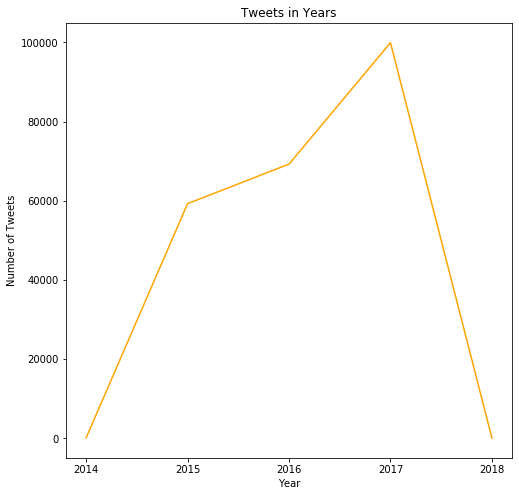

In [14]:
plt.rcParams["figure.figsize"] =  [8, 8]
plt.plot(analyzeYears.year, analyzeYears.author, color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Tweets in Years')
# xticks(np.arange(1995, 2015, step=2))
plt.show()
# plt.savefig("rating",dpi=500)

In [15]:
file.loc[file['year'] == 2017, 'month']
# analyzeMonths = file.groupby(['month'])['author'].count().reset_index()
# analyzeMonths

Series([], Name: month, dtype: object)

In [16]:
# plt.rcParams["figure.figsize"] =  [14, 8]
# a.plot.line()
# plt.xlabel('Year')
# plt.ylabel('Movies Released')
# plt.title('Movies Released in Years')
# # plt.show()
# plt.savefig("movierleeased",dpi=500)

In [17]:
# plt.rcParams["figure.figsize"] =  [12, 12]
# plt.plot(a['author'], a['just_date'], label = "Year 2000")
# plt.xlabel('author')
# plt.ylabel('just_date')
# plt.title('Movie Trends In Years')
# plt.legend()
# #plt.show()
# plt.savefig("movietrend",dpi=500)

In [18]:
# file.loc[file['content'] == 'Italian']
# s  = file[file['content'].str.contains('9')]
# s

In [115]:
text = file[(file['language']=='English') | (file['language']=='Russian')]
# text = file[(file['year']=='2017' ) & (file['month'] == '9')]

In [116]:
text = text[['content','language','month','year']]

In [117]:
# text_df = text.sort_values(['language'])

In [118]:
text_list = text.values.tolist()

In [23]:
text_list[:1]

[['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC',
  'English',
  '10',
  '2017']]

In [24]:
ind_russian = []
ind_english = []

for i in range(len(text_list)):
#     if text_list[i][2]=='9' and text_list[i][3]=='2017':
    if text_list[i][1]=='Russian':
        ind_russian.append(i)
    else :
        ind_english.append(i)


In [25]:
#(1) filtering hyperlinks and 
#(2) remove numbers and convert text into lowercase
#(3) separate emojis from text. create a list of set of emojis, each set represents the emojis in its respective locations tweet 
#(4) identifying '#' and creating a list of hashtag words
#(5) sentence into words
#(6) filtering punctuations
#(7) stop-words for english and russian tweets

In [29]:
%%time
text_h = []
emoji_list = []
hashtags_list = []
sentiment = []
punch = string.punctuation
stop_words_e = stopwords.words('english')
stop_words_r = stopwords.words('russian')

for i in range(len(text_list)):
    
    # (1)
    tweet = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', text_list[i][0], flags=re.MULTILINE)
     
    # (2)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = tweet.lower() #lowercase
    
    #sentiment
    blob = TextBlob(tweet)
    sentiment.append(blob.sentiment)
    
    #remove # and store word in list
    hastags_per_tweet = re.findall('\#(\w*)',tweet)

    if len(hastags_per_tweet) != 0:
        hashtags_list.append(hastags_per_tweet)
        
        
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
        
    # (3)
    emoji_set = demoji.findall(tweet)
    emoji_list.append(emoji_set)

    for emoj in emoji_set:
        tweet = tweet.replace(emoj,'')
    
    # (5)
    tweet = TreebankWordTokenizer().tokenize(tweet)
    tweet.sort()
    
    # (6)
    tweet = [words for words in tweet if words not in punch]
    
    # (7)
    if i<len(ind_english):
        tweet = [words for words in tweet if words not in stop_words_e]
    else:
        tweet = [words for words in tweet if words not in stop_words_r]
    
#     print(tweet)
    text_h.append(tweet)

Wall time: 4min 19s


In [30]:
polarity = []
subjectivity = []
for x in sentiment:
    polarity.append(x.polarity)
    subjectivity.append(x.subjectivity)

In [32]:
file['polarity'] = polarity
file['subjectivity'] = subjectivity

In [120]:
flatten  = [y for x in hashtags_list for y in x]

In [124]:
wordfreq = {}
for w in flatten:
    if w in wordfreq:
        wordfreq[w] +=1
    else:
        wordfreq[w] = 1
sorted_x = sorted(wordfreq.items(), key=operator.itemgetter(1),reverse=True)
sorted_x = sorted_x[:20]
trendingHashtag = [x[0] for x in sorted_x]
trendingHashtagNo = [x[1] for x in sorted_x]
# sorted_x

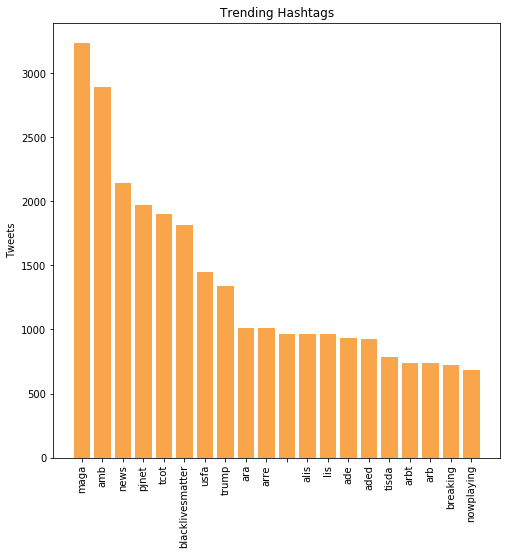

In [126]:
y_pos = np.arange(len(trendingHashtag))
# plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, trendingHashtagNo, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, trendingHashtag,rotation='vertical')
plt.ylabel('Tweets')
plt.title('Trending Hashtags')
plt.show()
# plt.savefig("TrendingHashtags",dpi=500)

In [128]:
# most used words trend
file1 = file[file['content'].str.contains("trump")]
file2 = file[file['content'].str.contains("hillary")]
# file3 = file[file['content'].str.contains("obama")]
file4 = file[file['content'].str.contains("election")]

In [129]:
# file1.head()
# (file1.author.unique())
# len(file1.external_author_id.unique())

In [130]:
# file.year.unique() #2014 to 2018
years = ['2014','2015','2016','2017','2018']

In [131]:
# most used words trend sentiment
data2014_trump = file1.loc[file1['year'] == '2014']
data2015_trump = file1.loc[file1['year'] == '2015']
data2016_trump = file1.loc[file1['year'] == '2016']
data2017_trump = file1.loc[file1['year'] == '2017']
data2018_trump = file1.loc[file1['year'] == '2018']

In [132]:
# most used words trend sentiment
data2014_hillary = file2.loc[file2['year'] == '2014']
data2015_hillary = file2.loc[file2['year'] == '2015']
data2016_hillary = file2.loc[file2['year'] == '2016']
data2017_hillary = file2.loc[file2['year'] == '2017']
data2018_hillary = file2.loc[file2['year'] == '2018']

In [133]:
# # most used words trend sentiment
# data2014_obama = file3.loc[file3['year'] == '2014']
# data2015_obama = file3.loc[file3['year'] == '2015']
# data2016_obama = file3.loc[file3['year'] == '2016']
# data2017_obama = file3.loc[file3['year'] == '2017']
# data2018_obama = file3.loc[file3['year'] == '2018']

In [134]:
# most used words trend sentiment
data2014_president = file4.loc[file4['year'] == '2014']
data2015_president = file4.loc[file4['year'] == '2015']
data2016_president = file4.loc[file4['year'] == '2016']
data2017_president = file4.loc[file4['year'] == '2017']
data2018_president = file4.loc[file4['year'] == '2018']

In [135]:
attr1_trump = data2014_trump['polarity'].mean(axis = 0, skipna = True)
attr2_trump = data2015_trump['polarity'].mean(axis = 0, skipna = True)
attr3_trump = data2016_trump['polarity'].mean(axis = 0, skipna = True)
attr4_trump = data2017_trump['polarity'].mean(axis = 0, skipna = True)
attr5_trump = data2018_trump['polarity'].mean(axis = 0, skipna = True)
polarity_trump = [attr1_trump,attr2_trump,attr3_trump,attr4_trump,attr5_trump]

In [136]:
attr1_hillary = data2014_hillary['polarity'].mean(axis = 0, skipna = True)
attr2_hillary = data2015_hillary['polarity'].mean(axis = 0, skipna = True)
attr3_hillary = data2016_hillary['polarity'].mean(axis = 0, skipna = True)
attr4_hillary = data2017_hillary['polarity'].mean(axis = 0, skipna = True)
attr5_hillary = data2018_hillary['polarity'].mean(axis = 0, skipna = True)
polarity_hillary = [attr1_hillary,attr2_hillary,attr3_hillary,attr4_hillary,attr5_hillary]

In [137]:
# attr1_obama = data2014_obama['polarity'].mean(axis = 0, skipna = True)
# attr2_obama = data2015_obama['polarity'].mean(axis = 0, skipna = True)
# attr3_obama = data2016_obama['polarity'].mean(axis = 0, skipna = True)
# attr4_obama = data2017_obama['polarity'].mean(axis = 0, skipna = True)
# attr5_obama = data2018_obama['polarity'].mean(axis = 0, skipna = True)
# polarity_obama = [attr1_obama,attr2_obama,attr3_obama,attr4_obama,attr5_obama]

In [138]:
attr1_president = data2014_president['polarity'].mean(axis = 0, skipna = True)
attr2_president = data2015_president['polarity'].mean(axis = 0, skipna = True)
attr3_president = data2016_president['polarity'].mean(axis = 0, skipna = True)
attr4_president = data2017_president['polarity'].mean(axis = 0, skipna = True)
attr5_president = data2018_president['polarity'].mean(axis = 0, skipna = True)
polarity_president = [attr1_president,attr2_president,attr3_president,attr4_president,attr5_president]

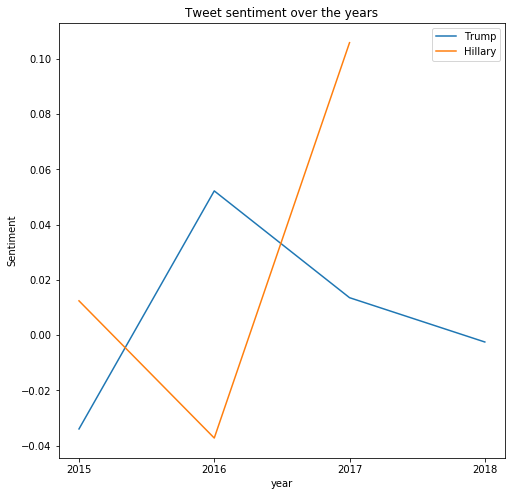

In [139]:
# plt.rcParams["figure.figsize"] =  [12, 12]
plt.plot(years, polarity_trump, label = "Trump")
plt.plot(years, polarity_hillary, label = "Hillary")
# plt.plot(years, polarity_obama, label = "Year 2010")
# plt.plot(years, polarity_president, label = "Year 2015")
plt.xlabel('year')
plt.ylabel('Sentiment')
plt.title('Tweet sentiment over the years')
plt.legend()
plt.show()
# plt.savefig("sentiment",dpi=500)

In [140]:
# authors_negativity = data2016_hillary.author.unique()
authors_negativity = data2016_hillary.groupby(['author'])['index'].count().reset_index()
# authors_negativity

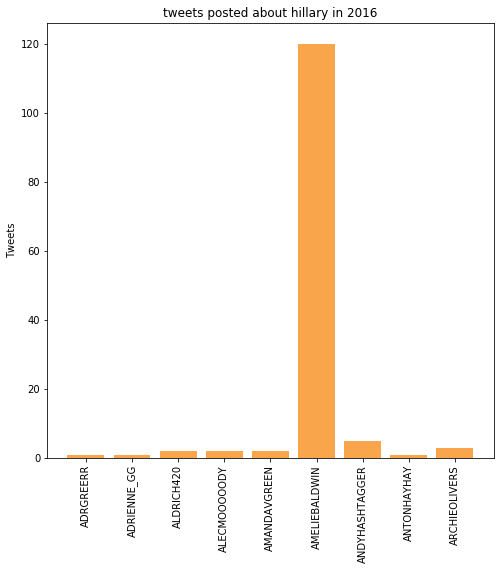

In [141]:
y_pos = np.arange(len(authors_negativity['author']))
# plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, authors_negativity['index'], align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, authors_negativity['author'],rotation='vertical')
plt.ylabel('Tweets')
plt.title('tweets posted about hillary in 2016')
plt.show()
# plt.savefig("TrendingHashtags",dpi=500)

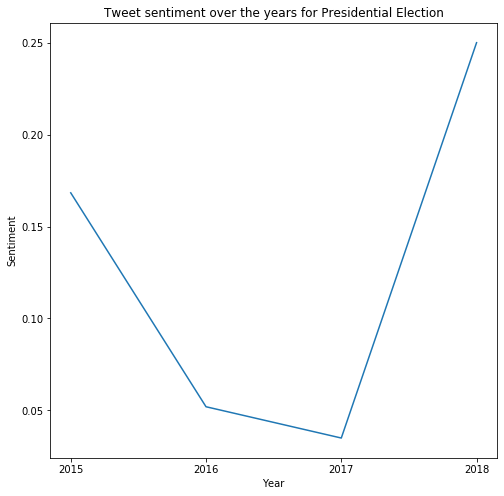

In [146]:
# plt.plot(years, polarity_obama, label = "Year 2010")
plt.plot(years, polarity_president)
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('Tweet sentiment over the years for Presidential Election')
# plt.legend()
plt.show()
# plt.savefig("sentiment",dpi=500)

In [170]:
attr1_trump = data2014_trump['subjectivity'].mean(axis = 0, skipna = True)
attr2_trump = data2015_trump['subjectivity'].mean(axis = 0, skipna = True)
attr3_trump = data2016_trump['subjectivity'].mean(axis = 0, skipna = True)
attr4_trump = data2017_trump['subjectivity'].mean(axis = 0, skipna = True)
attr5_trump = data2018_trump['subjectivity'].mean(axis = 0, skipna = True)
subjectivity_trump = [attr1_trump,attr2_trump,attr3_trump,attr4_trump,attr5_trump]

In [171]:
attr1_hillary = data2014_hillary['subjectivity'].mean(axis = 0, skipna = True)
attr2_hillary = data2015_hillary['subjectivity'].mean(axis = 0, skipna = True)
attr3_hillary = data2016_hillary['subjectivity'].mean(axis = 0, skipna = True)
attr4_hillary = data2017_hillary['subjectivity'].mean(axis = 0, skipna = True)
attr5_hillary = data2018_hillary['subjectivity'].mean(axis = 0, skipna = True)
subjectivity_hillary = [attr1_hillary,attr2_hillary,attr3_hillary,attr4_hillary,attr5_hillary]

In [ ]:
ratingvsyearless = [x[0] for x in ratingvsyear] #first column
ratingvsyearmore = [x[1] for x in ratingvsyear] #second column
ratinglabels = [x[2] for x in ratingvsyear] #third column

In [ ]:
x = np.arange(10)
ax1 = plt.subplot(1,1,1)
w = 0.3

plt.xticks(x + w, ratinglabels, rotation='vertical')
ratingnum =ax1.bar(x, ratingvsyearless, width=w, color='#F78F1E', align='center')
ax2 = ax1.twinx() # to use different bars on x axis
movienum =ax2.bar(x + w, ratingvsyearmore, width=w,color='#FFC222',align='center')

plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Ratings Before and After 2010')
plt.legend([ratingnum, movienum],['Rating before 2010', 'Rating after 2010'])
plt.show()
# plt.savefig("ratingbeforeafter",dpi=500)

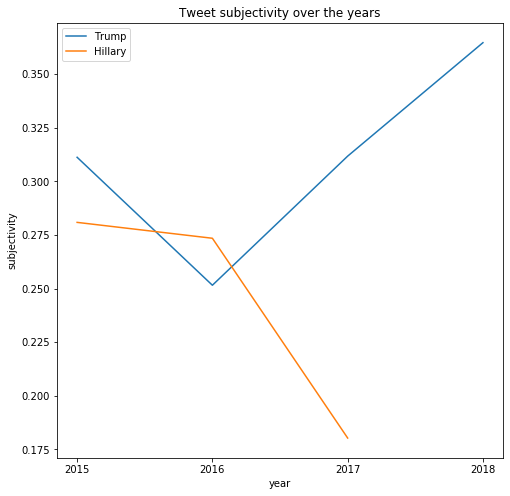

In [173]:
# plt.rcParams["figure.figsize"] =  [12, 12]
plt.plot(years, subjectivity_trump, label = "Trump")
plt.plot(years, subjectivity_hillary, label = "Hillary")
# plt.plot(years, polarity_obama, label = "Year 2010")
# plt.plot(years, polarity_president, label = "Year 2015")
plt.xlabel('year')
plt.ylabel('subjectivity')
plt.title('Tweet subjectivity over the years')
plt.legend()
plt.show()
# plt.savefig("sentiment",dpi=500)

In [184]:
# one-hot vector

In [148]:
# Bigram
model = Word2Vec(text_h)
#  min_count=1,size= 50,workers=3, window =3, sg = 1

In [109]:
# 1-Skip-gram
skip_model = Word2Vec(text_h,sg = 1)
#  min_count=1,size= 50,workers=3, window =3, sg = 1

In [52]:
# words = list(model.wv.vocab)
# print(words)

In [23]:
# v1 = model.wv['miami']
# v1 = model[model.wv.vocab]
# v1

In [150]:
words = list(model.wv.vocab)
highest = 0
for x in words:
    result = model.most_similar(positive=['madam', x], negative=['mr'], topn=1)
    print(x)
    print(result)

In [153]:
result = model.most_similar(positive=['mr', 'industrial'], negative=['madam'], topn=1)
print(result)

[('ideas', 0.9467995166778564)]


C:\Users\nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [154]:
result = model.most_similar_cosmul(positive=['woman', 'industrial'], negative=['man'])
print(result)

[('profiteering', 1.009194254875183), ('renewal', 1.0042377710342407), ('tariffs', 1.002394437789917), ('utility', 1.0015949010849), ('wwiii', 0.9997847080230713), ('sotu', 0.9968365430831909), ('poaching', 0.9966999292373657), ('starters', 0.9964951276779175), ('quarterly', 0.99614417552948), ('overhaul', 0.9959242343902588)]


C:\Users\nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


In [157]:
nearestNeighbours = model.most_similar('man')
nearestMen = [i[0] for i in nearestNeighbours]
nearestMen = ' '.join(nearestMen).replace('-','')
nearestMen

C:\Users\nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


'mother missing killed old outside london killer kills officer inside'

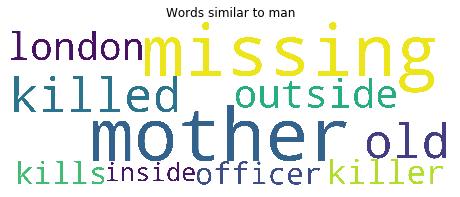

In [159]:
#compare it with skipgram also
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1500, width=4000).generate(nearestMen)
# plt.figure(figsize=(16,8))
plt.title("Words similar to man")
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()
# plt.savefig("words1",dpi=500)

In [160]:
nearestNeighbours = model.most_similar('woman')
nearestWomen = [i[0] for i in nearestNeighbours]
nearestWomen = ' '.join(nearestWomen).replace('-','')
nearestWomen

C:\Users\nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


'teen pregnant teens yearold raping shot teacher three suspects stabbed'

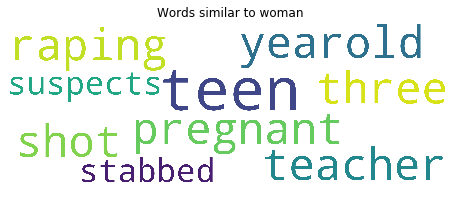

In [161]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1500, width=4000).generate(nearestWomen)
# plt.figure(figsize=(16,8))
plt.title("Words similar to woman")
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()
# plt.savefig("woman",dpi=500)

In [162]:
#if exists in whole dataset
nearestNeighbours = model.most_similar('africa') #black american African American to show racism
racism = [i[0] for i in nearestNeighbours]
# nearestWomen = ' '.join(nearestWomen).replace('-','')
racism

C:\Users\nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


['anger',
 'actors',
 'australia',
 'accountability',
 'addressing',
 'becoming',
 'award',
 'background',
 'behalf',
 'awareness']

In [169]:
#words occurances in our trained model
#not used anywhere, we can use instead of getting popular names from hashtags
w2c = dict()
for item in model.wv.vocab:
    w2c[item]=model.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
# w2cSorted

In [ ]:
# b = file.loc[file['year'] == '2017', 'language']
# c0 =0
# c1=0
# for x in b:
#     if x == 'English':
#         c0 +=1
#     else:
#         c1+=1
# print(c1)

In [195]:
# sim_words = model.wv.most_similar('hillary')
# sim_words

[('’', 0.9698026180267334),
 ('trump', 0.9586488604545593),
 ('breaking', 0.9586135745048523),
 ('new', 0.958206295967102),
 ('look', 0.956089973449707),
 ('obama', 0.9530141949653625),
 ('right', 0.9530028104782104),
 ('lol', 0.9527576565742493),
 ('не', 0.9509600400924683),
 ('‘', 0.9485880732536316)]

In [26]:
# Transition Matrix